# Medicinal Plant Image Classification(Loaded Model)

In [5]:
# Test Image
image_path = '/AyurAI/test_random_google_images/jack.jpeg'
model_path = '/AyurAI/plant_identification_model2.h5'

In [6]:
def display_img():
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    # Load and display the image
    img = mpimg.imread(image_path)

    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

In [7]:
label_mapping = {0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)',
 26: 'Syzygium Cumini (Jamun)',
 27: 'Syzygium Jambos (Rose Apple)',
 28: 'Tabernaemontana Divaricata (Crape Jasmine)',
 29: 'Trigonella Foenum-graecum (Fenugreek)'}

1/1 [==============================] - 0s 368ms/step


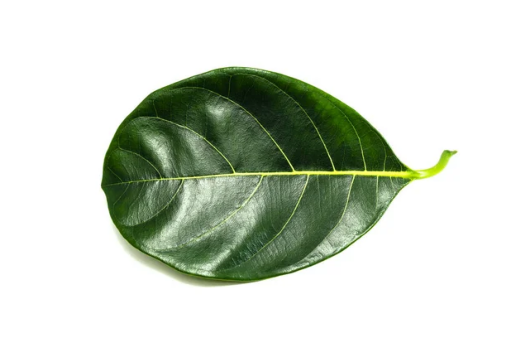

Predicted Label: Artocarpus Heterophyllus (Jackfruit)
Confidence: 0.59


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    
    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]
    
    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
display_img()
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

In [9]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model and label mapping
model_path = '/Users/raghavsingh/Documents/AyurAI/plant_identification_model2.h5'
model = tf.keras.models.load_model(model_path)

# label_mapping = {0: 'Alpinia Galanga (Rasna)',  # Your label mapping here...}

def preprocess_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

def predict_plant(image_path, label_mapping):
    # Perform prediction
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence
    
def detect_leaf(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for green color (you may need to adjust these values)
    lower_green = np.array([35, 100, 100])  # Lower bound for green in HSV
    upper_green = np.array([85, 255, 255])  # Upper bound for green in HSV

    # Create a mask to threshold the image
    mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through detected contours and get bounding box coordinates
    for contour in contours:
        x, y, width, height = cv2.boundingRect(contour)
        
        # Draw a green rectangle around the detected leaf
        color = (0, 255, 0)  # Green color in BGR
        thickness = 2
        cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness)

    # Add text with the predicted plant species name to the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (0, 0, 255)  # White color in BGR
    cv2.putText(image, predicted_label, (x, y - 10), font, font_scale, font_color, thickness=1, lineType=cv2.LINE_AA)

    # Display the image with the green box around the detected leaf
    cv2.imshow("Detected Leaf", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# # Provide the path to the image you want to classify
# image_path = '/Users/raghavsingh/Documents/AyurAI/test_random_google_images/mintleaf.jpeg'
# detect_and_draw_leaf(image_path)
# detect_leaf(image_path)



In [10]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model and label mapping
model_path = '/Users/raghavsingh/Documents/AyurAI/plant_identification_model2.h5'
model = tf.keras.models.load_model(model_path)

# Define label mapping (replace with your own)

def preprocess_image(image):
    # Resize and preprocess the image
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

def predict_plant(image, label_mapping):
    # Perform prediction
    preprocessed_image = preprocess_image(image)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Initialize the camera capture
cap = cv2.VideoCapture(0)  # Use the default camera (change to a different index if needed)

while True:
    ret, frame = cap.read()  # Read a frame from the camera

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to create a binary mask
    _, thresh = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through detected contours and get bounding box coordinates
    for contour in contours:
        x, y, width, height = cv2.boundingRect(contour)

        # Ensure that the detected region is of reasonable size
        if width > 50 and height > 50:
            # Crop the leaf region for prediction
            leaf_region = frame[y:y+height, x:x+width]
            
            # Perform plant species prediction on the cropped leaf
            predicted_label, confidence = predict_plant(leaf_region, label_mapping)

            # Add text with the predicted plant species name and confidence to the frame
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.5
            font_color = (0, 0, 255)  # Red color in BGR
            cv2.putText(frame, f'{predicted_label} ({confidence:.2f})', (x, y - 10), font, font_scale, font_color, thickness=1, lineType=cv2.LINE_AA)

            # Draw a green rectangle around the detected leaf
            color = (0, 255, 0)  # Green color in BGR
            thickness = 2
            cv2.rectangle(frame, (x, y), (x + width, y + height), color, thickness)

    # Display the frame with leaf detection and plant prediction
    cv2.imshow("Plant Species Recognition", frame)

    # Break the loop when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 19ms/step


KeyboardInterrupt: 

: 

In [ ]:
def process_image():
    # Open a file dialog to select an image
    file_path = filedialog.askopenfilename()
    
    if file_path:
        # Load and process the image
        image = cv2.imread(file_path)

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for green color (you may need to adjust these values)
    lower_green = np.array([35, 100, 100])  # Lower bound for green in HSV
    upper_green = np.array([85, 255, 255])  # Upper bound for green in HSV

    # Create a mask to threshold the image
    mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through detected contours and get bounding box coordinates
    for contour in contours:
        x, y, width, height = cv2.boundingRect(contour)
        
        # Draw a green rectangle around the detected leaf
        color = (0, 255, 0)  # Green color in BGR
        thickness = 2
        cv2.rectangle(image, (x, y), (x + width, y + height), color, thickness)

    # Add text with the predicted plant species name to the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (0, 0, 255)  # White color in BGR
    cv2.putText(image, predicted_label, (x, y - 10), font, font_scale, font_color, thickness=1, lineType=cv2.LINE_AA)

    # Display the image with the green box around the detected leaf
    cv2.imshow("Detected Leaf", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()